In [4]:
"""Auction mutation analysis"""

from __future__ import annotations

import json
from typing import List

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

matplotlib.rcParams['font.family'] = "monospace"
%matplotlib inline

In [5]:
import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [6]:
from core.core import decode_filename, save_plot, analysis_filename, ImageFormat

In [18]:
encoded_filenames = [
    "mutate_iterative_auction_basic_j12_s2_0",
    "mutate_iterative_auction_basic_j15_s2_0",
    "mutate_iterative_auction_basic_j15_s3_0",
    "mutate_iterative_auction_basic_j25_s5_0"
]
y_axis = 'Mutate Difference' 
title = 'Effect of task misrepresentation on prices'

In [23]:
data = []
model_names = []

for encoded_filename in encoded_filenames:
    filename, model_name, test_name = decode_filename("auction_mutation", encoded_filename)
    model_names.append(model_name)
    
    with open(filename) as file:
        file_data = json.load(file)

        for pos, result in enumerate(file_data):
            for mutation_name, mutation_results in result.items():
                if mutation_name == "no mutation":
                    data.append((pos, model_name, "No Mutation", mutation_results['total money'], 0, 0, 0, mutation_results['total_iterations']))
                else:
                    if mutation_results['mutant_value'] - mutation_results['mutated_value'] > 0:
                        print(mutation_results)
                    data.append((pos, model_name, "Mutation", mutation_results['total money'],
                                 mutation_results['mutant_value'], mutation_results['mutated_value'],                                     
                                 mutation_results['mutant_value'] - mutation_results['mutated_value'],
                                 mutation_results['total_iterations']))
data = reversed(data)

{'solve_time': 3.761, 'sum value': 518, 'percentage value': 0.942, 'percentage jobs': 0.867, 'server value': {'normal 0': 321, 'normal 1': 197}, 'server storage usage': {'normal 0': 0.982, 'normal 1': 0.981}, 'server computation usage': {'normal 0': 0.654, 'normal 1': 0.957}, 'server bandwidth usage': {'normal 0': 1.0, 'normal 1': 0.933}, 'individual_compute_time': 15, 'total_iterations': 37, 'total_messages': 205, 'total money': 304, 'prices': {'normal 0': 0, 'normal 2': 28, 'normal 3': 28, 'normal 4': 22, 'normal 6': 26, 'normal 9': 0, 'normal 12': 20, 'normal 7': 20, 'normal 1': 28, 'normal 14': 26, 'normal 11': 20, 'normal 5': 20, 'normal 8': 20, 'normal 13': 26, 'mutated normal 10': 20}, 'revenues': {'normal 0': 184, 'normal 1': 120}, 'price change': {'normal 0': 2, 'normal 1': 2}, 'difference': 'normal 10 - mutated normal 10: 0, 0, 0, 3, -1', 'mutant_value': 20, 'mutated_value': 0, 'allocated': False}
{'solve_time': 1.668, 'sum value': 729, 'percentage value': 1.0, 'percentage jo

In [24]:
df = pd.DataFrame(data, columns=['Pos', 'Model', 'Mutation', 'Total Money', 'Mutant Value', 'Mutated Value',
                                 'Mutate Difference', 'Iterations'])
df

,Pos,Model,Mutation,Total Money,Mutant Value,Mutated Value,Mutate Difference,Iterations
0,0,Jobs: 12 Servers: 2,No Mutation,318,0,0,0,102
1,0,Jobs: 12 Servers: 2,Mutation,322,0,0,0,113
2,0,Jobs: 12 Servers: 2,Mutation,280,0,58,-58,74
3,0,Jobs: 12 Servers: 2,Mutation,308,0,60,-60,97
4,0,Jobs: 12 Servers: 2,Mutation,274,0,60,-60,70
...,...,...,...,...,...,...,...,...
1703,49,Jobs: 25 Servers: 5,Mutation,754,0,40,-40,203
1704,49,Jobs: 25 Servers: 5,Mutation,724,0,42,-42,178
1705,49,Jobs: 25 Servers: 5,Mutation,794,0,0,0,215
1706,49,Jobs: 25 Servers: 5,Mutation,716,0,38,-38,193


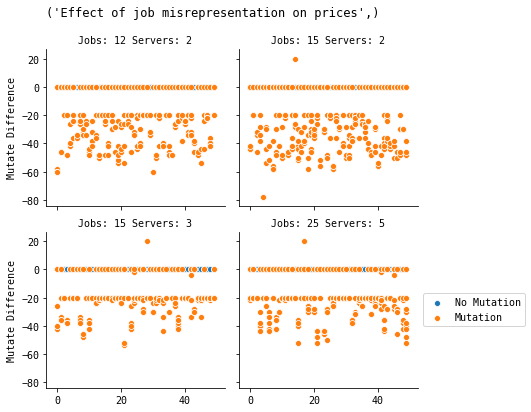

In [28]:
g = sns.FacetGrid(df, col='Model', col_wrap=2, hue='Mutation')
g = (g.map(sns.scatterplot, 'Pos', y_axis)
     .set_titles('{col_name}').set_xlabels('').add_legend())

g.fig.subplots_adjust(top=0.88)
g.fig.suptitle(title)

save_plot('auction_mutation', 'auction_mutation', image_formats=[ImageFormat.PNG, ImageFormat.EPS])
plt.show()